[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/tutorial/notebooks/bragg_edge_peak_fitting/#activate-search)
<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [1]:
from __code import system
from __code.bragg_edge.bragg_edge_peak_fitting import BraggEdge, Interface

system.System.select_working_dir(facility='SNS', instrument='VENUS')
from __code.__all import custom_style
custom_style.style()

# from plotly.offline import plot, init_notebook_mode, iplot
# init_notebook_mode()

** Using Debugging Mode! **


## Prepare UI engine 

In [2]:
%gui qt

# Select Normalized Data Input Folder

Data and time spectra files will be loaded

In [3]:
o_bragg = BraggEdge(working_dir=system.System.get_working_dir())
o_bragg.select_working_folder()

# Select Open Beam Data Input folder 

In [4]:
o_bragg.select_ob_folder()

# Select sample region and peak to fit

### Select how many random files to use to select region to fit

In [5]:
o_bragg.how_many_data_to_use_to_select_sample_roi()

### fit ui 

In [6]:
o_interface = Interface(o_bragg=o_bragg, spectra_file=o_bragg.spectra_file)
o_interface.show()

/Users/j35/git/python_notebooks/notebooks/__code/bragg_edge/peak_fitting_interface_initialization.py:59: RuntimeWarning:

invalid value encountered in true_divide

//miniconda3/envs/py36/lib/python3.6/site-packages/pyqtgraph/graphicsItems/PlotCurveItem.py:131: RuntimeWarning:

All-NaN slice encountered



# DEBUGGING

In [1]:
from __code import system
from __code.bragg_edge.bragg_edge_peak_fitting import BraggEdge, Interface

In [2]:
%gui qt

In [3]:
data_path = "/Users/j35/IPTS/VENUS/IPTS-25778_normalized"
import glob
import os
list_data = glob.glob(data_path + "*.tif")
spectra_file = os.path.join(data_path, "Image019_Spectra.txt")
assert os.path.exists(spectra_file)

In [4]:
o_bragg = BraggEdge(working_dir=data_path)
o_bragg.load_data(data_path)

In [5]:
o_interface = Interface(o_bragg=o_bragg,
                        working_dir=data_path,
                        spectra_file=spectra_file)
o_interface.show()

In [7]:
x_axis = o_interface.debug_x_axis
y_axis = o_interface.debug_y_axis
a0 = o_interface.debug_a0
b0 = o_interface.debug_b0

In [9]:
import numpy as np
def kropff_high_lambda(lda, a0, b0):
    """Equation 7.2 found in Development and application of Bragg edge neutron transmission
    imaging on the IMAT beamline. Thesis by Ranggi Sahmura Ramadhan. June 2019
    :param
    lda (Lambda - Angstroms)
    a0 parameter to fit
    b0 parameter to fit
    """
    if (a0 == np.NaN) or (b0 == np.NaN):
        return None
    exp_expression = np.exp(-(a0 + b0 * lda))
    return exp_expression

In [10]:
y_axis_fitted = kropff_high_lambda(x_axis, a0, b0)

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


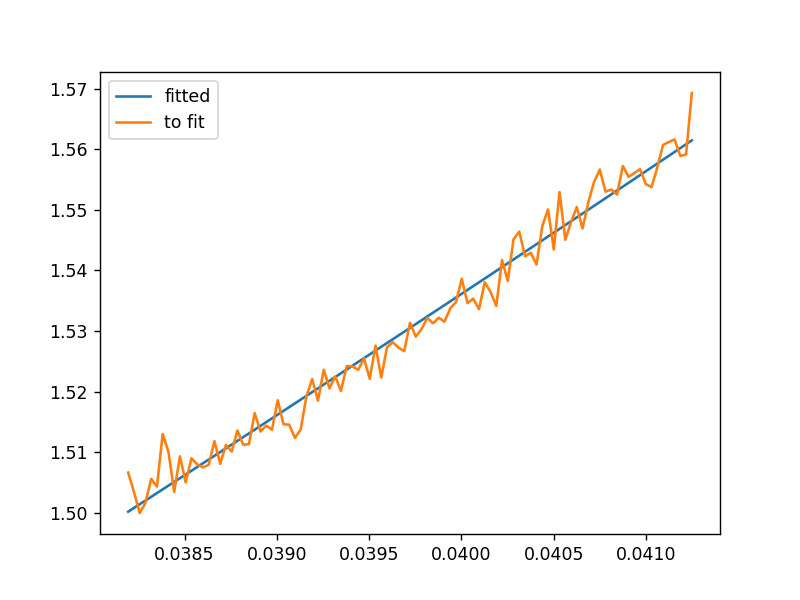

In [19]:
plt.plot(x_axis, y_axis_fitted, label='fitted')
plt.plot(x_axis, y_axis, label='to fit')
plt.legend()

# DEBUGGING using import straight 

In [ ]:
from __code import system
from __code.bragg_edge.bragg_edge_peak_fitting import BraggEdge, Interface

In [ ]:
%gui qt

In [ ]:
data_path = "/Users/j35/IPTS/SNAP/Si_normalized"
o_interface = Interface(working_dir=data_path)
o_interface.show()